In [ ]:
import os
import cv2
import numpy as np

#Path to directories
image_folder = "images"
label_folder = "labels"
output_mask_folder = "output_masks"

# Ensure output folder exists
os.makedirs(output_mask_folder, exist_ok=True)

def create_binary_mask(image_path, label_path):
    """Generates a binary mask from YOLO segmentation labels."""
    
    # Read image to get its dimensions
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image {image_path}")
        return
    
    # Only height and width is required, not channel
    height, width, _ = image.shape  
    # Create an empty black mask
    binary_mask = np.zeros((height, width), dtype=np.uint8)  
    
    # Read YOLO segmentation labels
    if os.path.exists(label_path):
        with open(label_path, "r") as file:
            lines = file.readlines()

        for line in lines:
            data = line.strip().split()
            
            # Convert normalized YOLO coordinates to pixel coordinates
            polygon = np.array([
                (float(data[i]) * width, float(data[i + 1]) * height)
                for i in range(1, len(data), 2)
            ], np.int32)

            # Fill the polygon in the mask
            cv2.fillPoly(binary_mask, [polygon], color=255)

        # Save the binary mask
        mask_filename = os.path.basename(image_path).replace(".jpg", "_mask.jpg").replace(".png", "_mask.png")
        mask_output_path = os.path.join(output_mask_folder, mask_filename)
        cv2.imwrite(mask_output_path, binary_mask)
        print(f"Saved binary mask: {mask_output_path}\n")
    else:
        print(f"No label file found for {image_path}")

# Process all images in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(image_folder, filename)
        label_path = os.path.join(label_folder, filename.replace(".jpg", ".txt").replace(".png", ".txt"))
        create_binary_mask(image_path, label_path)


In [ ]:

image_dir = "images"
mask_dir = "labels"

images = os.listdir(image_dir)
masks = os.listdir(mask_dir)

In [3]:
image = os.path.join(image_dir, images[0])
mask = os.path.join(mask_dir, masks[0])

In [7]:
img = cv2.imread(image)
msk = cv2.imread(mask)

print(img.shape)
print(msk.shape)

(640, 640, 3)
(640, 640, 3)


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

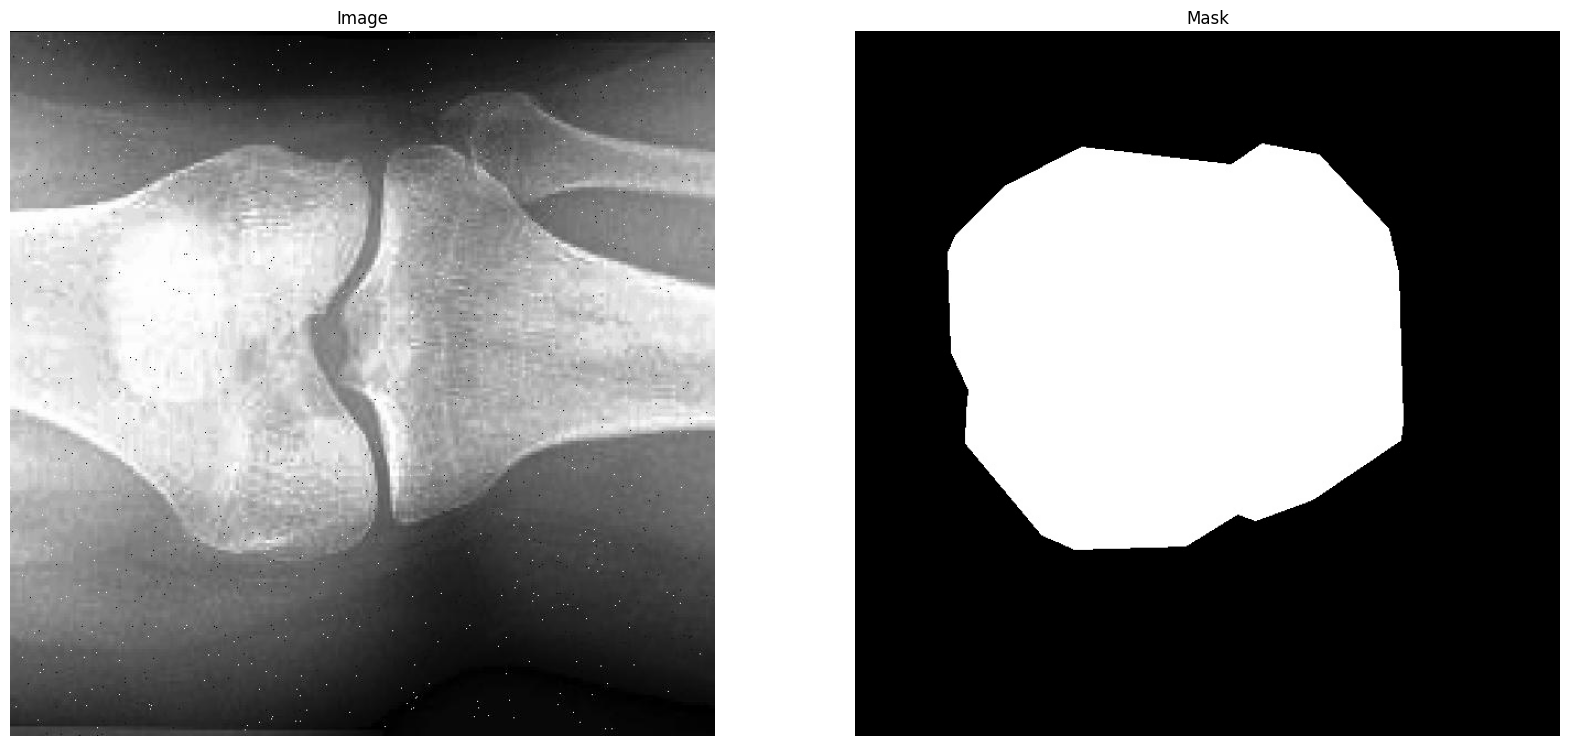

In [8]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(20, 20))

axes[0].imshow(img)
axes[0].set_title('Image')
axes[0].axis('off')  

axes[1].imshow(msk)  
axes[1].set_title('Mask')
axes[1].axis('off')